# ASSIGNMENT 3: Z Transform and IIR filters

Digital filters are central in signal processing because they allow us to emphasize or suppress selected frequency components. Typical examples include removing low-frequency drift from biomedical signals, reducing noise in sensor measurements, smoothing signals for control systems, and shaping audio with equalization.

![Overview of time domain, frequency response, and pole-zero view of a digital filter](z-transform_dfa3.jpg)

The Z-transform is a mathematical tool that represents a discrete-time signal or system in a domain where filtering becomes easier to analyze. For a discrete-time signal $x[n]$, the Z-transform is defined as

$X(z) = \sum_{n=-\infty}^{\infty} x[n] z^{-n}$

Many filters are modeled as linear time-invariant (LTI) systems. Linear means that the response to a weighted sum of inputs equals the same weighted sum of the individual responses. Time-invariant means that if the input is shifted in time, the output shifts by the same amount. A common example of an LTI system is a digital filter that processes an audio stream or a sensor signal using the same fixed set of coefficients at every time step.

For LTI systems, the Z-transform leads to the transfer function $H(z)$, which is a ratio of two polynomials in $z^{-1}$. This representation connects three complementary viewpoints that are used throughout filter analysis:

* Time domain: the impulse response $h[n]$ describes how the system reacts to an impulse and fully characterizes an LTI filter.

* Frequency domain: the frequency response $H(e^{j\omega})$ describes how each frequency is amplified or attenuated. It is obtained by evaluating the transfer function on the unit circle, $z = e^{j\omega}$.

* Pole-zero domain: poles and zeros describe the filter structure. Zeros indicate frequencies that are attenuated, poles indicate frequencies that are amplified, and their locations determine stability and selectivity.

In this assignment you will compute the frequency response, inspect the impulse response, and visualize poles and zeros for a given IIR filter transfer function. The next section introduces how to represent an IIR filter in Python using numerator and denominator coefficient arrays.


## Digital Infinite Impulse Response (IIR) Filter in Python
IIR filters can be represented in Python by writing the numerator and denominator coefficients to arrays.
For example, a simple IIR filter with the transfer function

$H(z)=\frac{b_{0}+b_{1} * z^{-1}+b_{2} * z^{-2}}{a_{0}+a_{1} * z^{-1}+a_{2} * z^{-2}}$

can be written in Python as follows:
```python
b = np.array([b0, b1, b2])
a = np.array([a0, a1, a2])
```
For the following tasks you need a transfer function of an IIR filter. Use the filter $H_1$ if your student number is
odd or $H_2$ if it is even.

$H_{1}(z) = \frac{1-1.618 z^{-1}+z^{-2}}{1-1.516 z^{-1}+0.878 z^{-2}}$

$H_{2}(z) = \frac{0.398 z^{-1}}{1-1.031 z^{-1}+0.353 z^{-2}}$

Start by running the code block below to load the Python packages required to complete this assignment. To run the code, select the code block and push Ctrl+Enter or click the Run button.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from dftools import impz, zplane
%matplotlib inline

**Task 3.1** Calculate the frequency response of the filter using the function *freqz* found in the package `scipy.signal`. Plot the magnitude and phase responses of the filter.

The function *freqz* takes the coefficients of the filter as arguments and returns two values: <b>w</b> and **h** where <b>w</b> contains the points at which the frequency response was calculated and <b>h</b> contains the complex values of the frequency response of the filter corresponding to the frequencies in <b>w</b>.
Examples:
```python
w, h = signal.freqz(b, a)       # A 512 point complex frequency response is assigned to the array h
                                # w contains the frequencies at which h was calculated (fs=2π by default)
w, h = signal.freqz(b, a, n)    # An n point complex frequency response is assigned to the array h
```

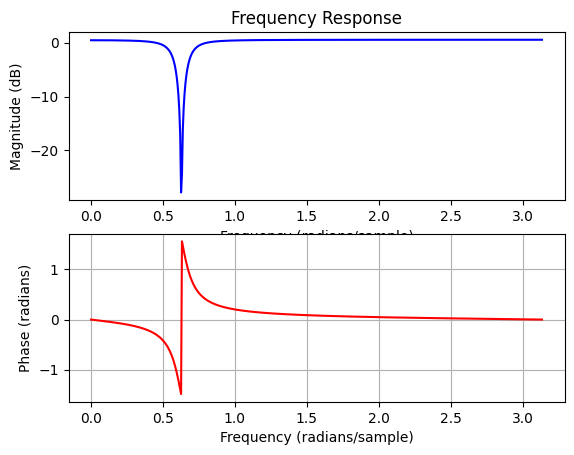

In [4]:
# store the coefficients of your filter in two NumPy arrays
b = np.array([1, -1.618, 1])
a = np.array([1, -1.516, 0.878])

# calculate the frequency response
w, h = signal.freqz(b, a)

# plot the magnitude and phase responses
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.title('Frequency Response')
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Magnitude (dB)')

plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h), 'r')
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Phase (radians)')
plt.grid()

**Look at the magnitude response of your filter. What type of filter is it (low/high pass, band
stop/pass)?**

`* Band Stop Filter *`

Use the freqz function with the parameter `whole` set to `True` and plot the resulting magnitude and phase responses again.
```python
signal.freqz(b, a, whole=True)
```

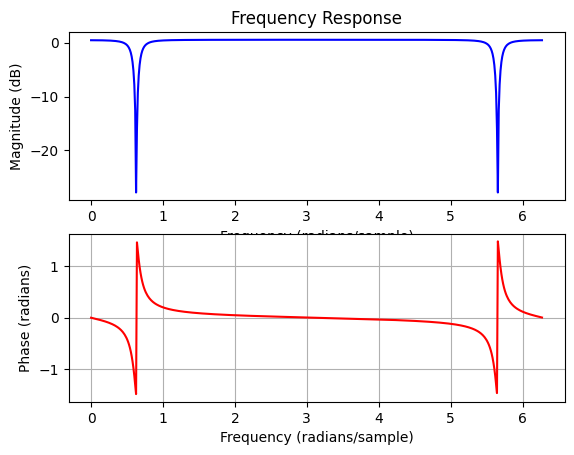

In [6]:
# enter your code here
w, h = signal.freqz(b, a, whole=True)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.title('Frequency Response')
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Magnitude (dB)')

plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h), 'r')
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Phase (radians)')
plt.grid()

**What is the difference between this plot and the one you drew at the beginning of the task?**

`* This one shows the full period (0 to 2pi), the previous one was from 0 to pi radians/sample *`

**Task 3.2** Plot the first 20 samples of the impulse response of your filter. Use the function
impz to calculate the impulse response. This function takes the same first three parameters as the freqz function. You can see the details of this function in the file dftools.py provided with this assignment.

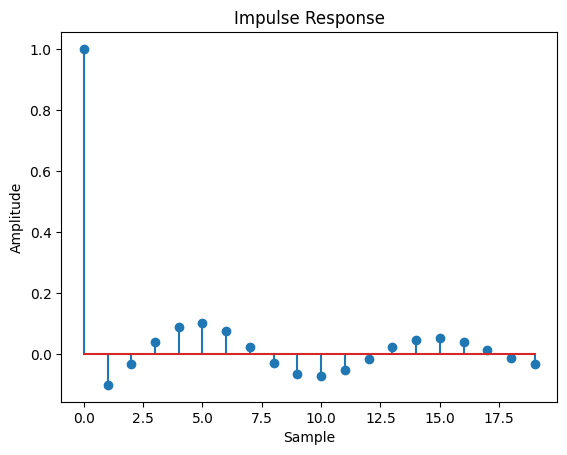

In [7]:
# calculate and plot the impulse response
w, h = signal.freqz(b, a)


h = impz(b, a, 20)

# Plot the impulse response
plt.figure()
plt.stem(h)
plt.title('Impulse Response')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

**Task 3.3** Draw the zero-pole plot of your filter using the function *zplane*. This function also
works with the same parameters as the freqz function, with the exception that there is no need
for the length parameter n. You can see the details of this function in the file dftools.py provided with this assignment.

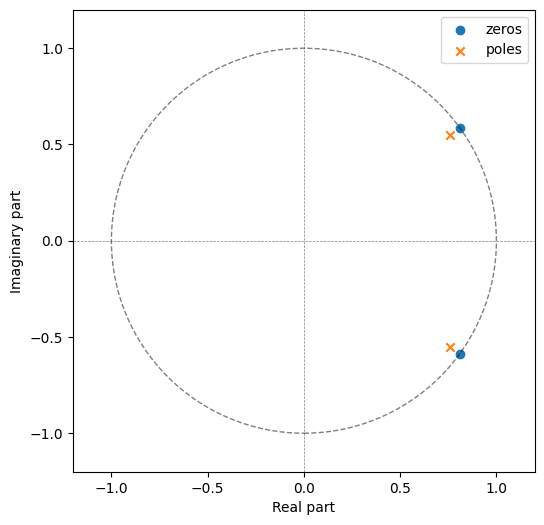

In [8]:
# plot the zeros and poles of the filter
zplane(b, a)

### Instructions for submission
1. Make sure that your code produces the desired results from scratch by selecting Kernel -> Restart & Run all. This will clear the output of your code and run all the code cells again from top to bottom.

2. Rename this notebook to `DF_Assignment3_firstname_lastname_studentnumber.ipynb`.

3. Submit only the resulting notebook (.ipynb file) to the return box in Moodle. Send your submission before the deadline to receive additional week exam points.